# **Checkpoint 2**

## **Importación de bibliotecas y datasets de entrenamiento y evaluación.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
import joblib

### **Dataset de entrenamiento**

A continuación, importaremos el dataframe obtenido luego de finalizar el checkpoint 1:

In [ ]:
df_chp1 = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/dataset_chp1.csv')
df = df_chp1.copy()
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,No Deposit,9,Undefined,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,Yes
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,No Deposit,Undefined,Undefined,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,No
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,No Deposit,9,Undefined,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,No
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,Non Refund,154,Undefined,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,Yes
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,No Deposit,20,Undefined,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0,...,No Deposit,240,Undefined,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,Yes
61909,City Hotel,0,2016,September,36,2,0,1,1,0,...,No Deposit,Undefined,Undefined,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,No
61910,City Hotel,10,2017,May,19,8,1,2,1,0,...,No Deposit,Undefined,153,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,No
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0,...,Non Refund,96,Undefined,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,Yes


Los tipos de dato de las variables actuales son los siguientes:

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

En el checkpoint 1, inicialmente, a las viariables que tomaban como valores "0" o "1", como lo son "is_repeated_guest" y "is_canceled", les reemplazamos los valores por "No" o "Yes", respectivamente, con el fin de que quede más clara la clasificación de las variables.

Ahora que trabajaremos con arbóles los cuales necesitan que las variables tomen valores numéricos, volveremos a convertir dichos valores a "0" o "1".

In [ ]:
cols_to_replace = ['is_repeated_guest', 'is_canceled']
df[cols_to_replace] = df[cols_to_replace].replace({'Yes': 1, 'No': 0})

### **Dataset de evaluación**

Importamos el dataset de test para el cual hay que predecir nuestro target, 'is_canceled'

In [ ]:
df_test_default = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/hotels_test.csv')
df_test = df_test_default.copy()
df_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.00,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.00,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.00,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.00,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.00,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,City Hotel,31,2017,April,16,21,2,3,2,0.0,...,No Deposit,21.0,NaN,0,Transient-Party,85.00,0,0,2017-04-26,636ccded-66ad-4538-8006-c0b9f84c6256
26531,City Hotel,130,2016,September,36,3,2,1,2,0.0,...,No Deposit,42.0,NaN,0,Transient,80.75,0,0,2016-09-06,11e19741-bd28-4459-8ea3-184f1664000f
26532,Resort Hotel,45,2016,August,35,22,1,1,2,0.0,...,No Deposit,240.0,NaN,0,Transient,231.00,0,0,2016-08-04,36a4c7b0-d6b1-4528-93db-311be96ec1c6
26533,City Hotel,164,2017,August,32,10,2,4,2,0.0,...,No Deposit,85.0,NaN,0,Transient,80.10,0,0,2017-03-07,89c85fa5-2b3d-4131-844c-e151a65ca240


In [ ]:
df_test.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Tendremos que modificar el dataset de test de igual forma que lo hicimos con el dataset que utilizaremos para entrenar al modelo.

Primero, eliminaremos la variable "reservation_status_date"

In [ ]:
df_test = df_test.drop('reservation_status_date', axis=1)

In [ ]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

country    0.001534
agent      0.054318
company    0.407313
dtype: float64

Trataremos los datos nulos de igual manera que los tratamos con el dataset de entrenamiento

In [ ]:
df_test.fillna(value={'country': 'Undefined', 'company': 0, 'agent': 0}, inplace=True)

cols_float_to_int = ['agent', 'company']
df_test[cols_float_to_int] = df_test[cols_float_to_int].astype(int)

cols_to_str = ['agent', 'company']
df_test[cols_to_str] = df_test[cols_to_str].replace({0: 'Undefined'})
df_test[cols_to_str] = df_test[cols_to_str].astype(str)

In [ ]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

Series([], dtype: float64)

## **a) Árboles de decisión y optimización de hiperparámetros**

En esta sección utilizaremos el método de k-fold
Cross Validation para hallar los mejores hiperparámetros para nuestro modelo predictor.

Algunos de los hiperparámetros que queremos hallar para los árboles de decisión son:
* El criterio de elección de atributos en cada nodo (Ganancia de información, Gini)
* Máxima profundidad del árbol (max depth)
* Estrategia de poda (poda de complejidad de costos -> ccp_alpha)

La métrica que consideramos adecuada para la búqueda de estos parámetros es el *F1 Score*. Elegimos ésta ya que queremos tener un balance entre la cantidad de falsos positivos y falsos negativos, e intentaremos minimizar ambas. Hacemos esto porque, por un lado, en el caso de los falsos positivos, estaríamos prediciendo que una reserva será cancelada cuando en realidad no lo será. Esto puede ser perjudicial para un hotel debido a que podría no tomar una reserva pensando que ésta va a ser cancelada y perdería un posible cliente. Por otro lado, en el caso de los falsos negativos, estaríamos prediciendo que una reserva no será cancelada cuando en realidad lo será. Esto también es una pérdida para el hotel ya que pierde la oportunidad de hacerle una reserva a alguien que no la cancelará.

### Funciones auxiliares

In [ ]:
def grafico_matriz_confusion(y_test, y_pred):
  tabla = confusion_matrix(y_test, y_pred)
  sns.heatmap(tabla, cmap='crest', annot=True, fmt='g')
  plt.xlabel('Predicho')
  plt.ylabel('Real')
  plt.show()

In [ ]:
def imprimir_importancia_atributos(clf, top_n=None):
  feat_imps = clf.feature_importances_
  features = clf.feature_names_in_
  importancias_y_atributos = zip(feat_imps,features)

  for i, imp_y_at in enumerate(sorted(importancias_y_atributos, reverse=True)):
    feat_imp, feat = imp_y_at[0], imp_y_at[1]
    if top_n and i == top_n:
      break
    if feat_imp > 0:
      print(f"{i+1}. {feat}: {feat_imp}")

In [ ]:
def grafico_arbol(clf, feature_names=None, max_depth=None, figsize=(100,100)):
  plt.figure(figsize=figsize)
  tree_plot = plot_tree(clf, max_depth=max_depth, feature_names=feature_names, filled=True, rounded=True, class_names=['Not canceled','Canceled']) #clf.classes_
  plt.show(tree_plot)

In [ ]:
def imprimir_f1_score(y_test, y_pred):
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1 score:", f1)

In [ ]:
def predecir_y_exportar_a_csv(clf, x_test, f1_score_en_train):
    y_pred = clf.predict(x_test)

    df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})

    params = clf.get_params()
    max_depth = params['max_depth']
    criterion = params['criterion']
    ccp_alpha = params['ccp_alpha']

    df_submission.to_csv(f"max_d{max_depth}-{criterion}-ccp_alpha{ccp_alpha}-f1_score{f1_score_en_train}.csv", index=False)

In [ ]:
def guardar_modelo(clf, f1_score_en_train):
    params = clf.get_params()
    max_depth = params['max_depth']
    criterion = params['criterion']
    ccp_alpha = params['ccp_alpha']
    
    joblib.dump(clf, f'clf-max_d{max_depth}-{criterion}-ccp_alpha{ccp_alpha}-f1_score{f1_score_en_train}.joblib')

### **Creación de un árbol muy simple**

Ahora, crearemos un árbol muy simple. Sabemos que éste no es bueno para lograr nuestro objetivo. Esto lo hacemos para ver el resultado de una métrica para el mismo, y así tener una noción básica del mínimo puntaje que debemos superar.

In [ ]:
df_numeric = df.select_dtypes(include='number')

A continuación, crearemos un conjunto de entrenamiento con el 80% de los datos y otro conjunto de test con el 20%.

Intentaremos respetar la proporción de nuestro "target" ("is_canceled") en ambos conjuntos.

In [ ]:
target = 'is_canceled'
features = df_numeric.columns.tolist()
features.remove(target)

Vemos la proporción de la variable "target" antes de splitear, para poder compararla con la propoprción luego de hacerlo.

In [ ]:
df_numeric[target].value_counts(normalize=True)*100

0    50.025035
1    49.974965
Name: is_canceled, dtype: float64

Ahora separamos la data en dos sets, uno de train y uno de test, y verificamos que se respete la proporción obtenida anteriormente en cada uno de los splits.

In [ ]:
#Creamos un dataframe con los features que vamos a usar para clasificar
df_numeric_x = df_numeric[features].copy()

#Creamos un dataframe con la variable target
df_numeric_y = df_numeric[target].copy()

In [ ]:
x_train_numeric, x_val_numeric, y_train_numeric, y_val_numeric = train_test_split(df_numeric_x, df_numeric_y, test_size=0.2, random_state=0, stratify=df_numeric[target].values)

#Verificamos que las proporciones de datos de train y test sean las correctas
print(f"Entrenamiento: {len(x_train_numeric)/len(df_numeric)}% de los datos")
print(f"Test: {len(x_val_numeric)/len(df_numeric)}% de los datos")

#Verificamos que la distribución de nuestro "target" esté balanceada en cada split
print(f"Porcentaje de reservas canceladas en Entrenamiento: {pd.Series(y_train_numeric).value_counts(normalize=True)[1]*100}%")
print(f"Porcentaje de reservas canceladas en Test: {pd.Series(y_val_numeric).value_counts(normalize=True)[1]*100}%")

Entrenamiento: 0.7999935393213057% de los datos
Test: 0.2000064606786943% de los datos
Porcentaje de reservas canceladas en Entrenamiento: 49.97577225923683%
Porcentaje de reservas canceladas en Test: 49.97173544375354%


Ahora entrenamos al modelo, predecimos el valor del target, graficamos la matriz de confusión y obtenemos el valor del "f1 score" para ver qué tan bueno es el modelo.

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(x_train_numeric, y_train_numeric)

y_pred_numeric = clf.predict(x_val_numeric)

imprimir_f1_score(y_val_numeric, y_pred_numeric)

F1 score: 0.6878666553266927


Entonces, podemos decir que nuestro futuro modelo deberá tener un F1 Score mayor a 0,69.

Graficamos el árbol

In [ ]:
clf.classes_

array([0, 1])

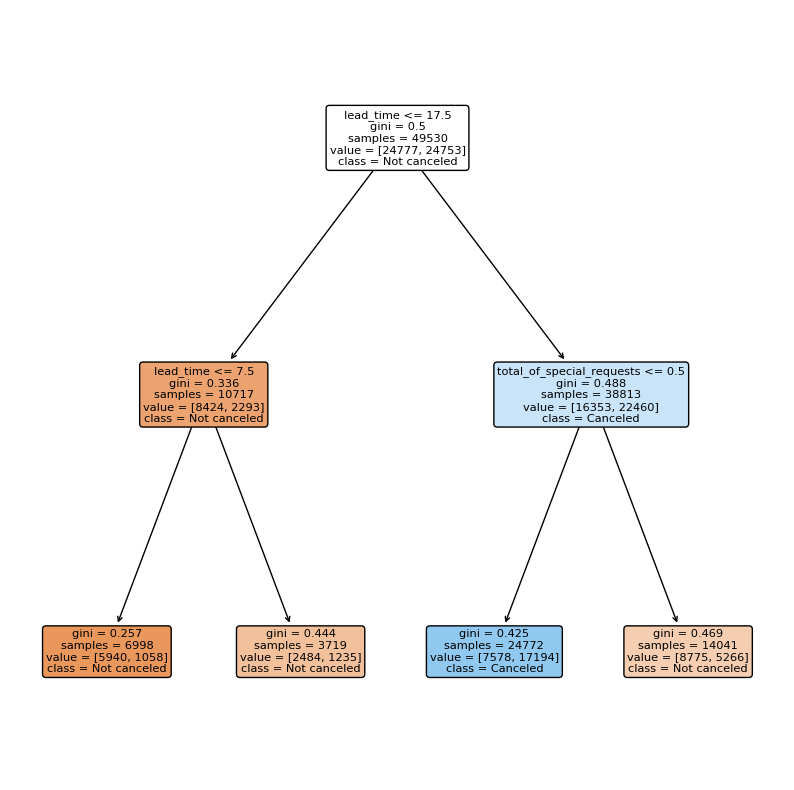

In [ ]:
feature_names = df_numeric_x.columns.to_list()
grafico_arbol(clf, feature_names, figsize=(10,10))

### **Creación del set de entrenamiento y del set de test para la búsqueda de la mejor combinación de hiperparámetros mediante la validación cruzada.**

In [ ]:
df_train_completo = df.copy()

columna_a_eliminar = ['id']
df_train_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

In [ ]:
target = 'is_canceled'
features = df_train_completo.columns.tolist()
features.remove(target)

Ahora haremos One Hot Encoding para todas las variables cualitativas de nuestro dataframe para no perder nada de información y entrenaremos y evaluaremos un modelo.

In [ ]:
df_train_completo = pd.get_dummies(df_train_completo, columns=df[features].select_dtypes('object').columns.tolist())

In [ ]:
#Creamos un dataframe con los features que vamos a usar para clasificar
features_para_clasificar = df_train_completo.columns.tolist()
features_para_clasificar.remove(target)
df_train_completo_x = df_train_completo[features_para_clasificar]

#Creamos un dataframe con la variable target
df_train_completo_y = df_train_completo[target].copy()

Antes de obtener el set de datos para el hallazgo de los mejores hiperparámetros y el entrenamiento del modelo, nos aseguraremos de que set de datos de entrenamiento y el de test ("hotels_test.csv") tengan las mismas variables, para luego poder realizar la predicción. Esto lo hacemos para que no haya variables que existan en un dataframe y no en el otro.

Por ejemplo, puede que al hacer One Hot Encoding para el dataset de entrenamiento tengamos una columna llamada "country_ARG", pero luego puede que en el dataset de entrenamiento la variable country no tome como valor "ARG" en ninguna de las reservas. Entonces esta nueva variable dummy no nos serviría para entrenar el modelo y luego predecir.

Entonces, nos quedaremos con las variables dummies de los dataset de entrenamiento y test que pertenezcan a ambos.

Hacemos el One Hot Encoding para todas las variables cualitativas

In [ ]:
df_test_completo = df_test.copy()

columna_a_eliminar = ['id']
df_test_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

features = df_test_completo.columns.tolist()

df_test_completo = pd.get_dummies(df_test_completo, columns=df_test_completo[features].select_dtypes('object').columns.tolist())

Ahora nos quedamos con las variables que tienen en común los dataset de entrenamiento y test.

In [ ]:
cols_df_train_completo_x = set(df_train_completo_x.columns)
cols_df_test_completo = set(df_test_completo.columns)

cols_solo_train = cols_df_train_completo_x.difference(cols_df_test_completo)
cols_solo_test = cols_df_test_completo.difference(cols_df_train_completo_x)

columnas_a_eliminar_de_train = list(cols_solo_train)
df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)

columnas_a_eliminar_de_test = list(cols_solo_test)
df_test_completo.drop(columnas_a_eliminar_de_test, axis='columns', inplace=True)

<ipython-input-30-af243c21312f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_completo_x, df_train_completo_y, test_size=0.2, random_state=0, stratify=df[target].values)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

F1 score: 0.8448647468777031


In [ ]:
print(f"Profundidad del árbol: {clf.tree_.max_depth}")

Profundidad máxima del árbol: 52


Podemos ver que este árbol es mucho más preciso que el anterior (que el "simple"), pero es infinitamente más complejo, tanto computacionalmente como conceptualmente. Además, este árbol probablemente esté sobreentrenado ya que se hace muchas más "preguntas" de las que debería para determinar si una reserva será cancelada o no. Seguro existe un árbol mucho más chico y más simple que tenga un rendimiento similar.

Para hallar dicho árbol, hallaremos los hiperparámetros correspondientes a continuación. La cantidad de *folds* que elegimos utilizar para Cross Validation es 5.

In [ ]:
##KFOLD CV Grid Search para buscar el mejor árbol (los mejores atributos, hiperparámetros, etc)

#Cantidad de ccp_alpha's para la poda
n=10

#Conjunto de parámetros que queremos usar
params_grid = {'criterion':['gini', 'entropy'], 'ccp_alpha':np.linspace(0,0.01,n), 'max_depth':list(range(5,25))} 
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
clf = DecisionTreeClassifier() 

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Grid Search Cross Validation
gridcv = GridSearchCV(estimator=clf , param_grid=params_grid, scoring=scorer_fn, cv=kfoldcv, return_train_score='True')
#Buscamos los hiperparámetros que optimizan F1 Score
gridcv.fit(x_train,y_train)

In [ ]:
print(f"Mejores hiperparámetros del arbol: {gridcv.best_params_}")
print(f"Mejor F1 Score: {gridcv.best_score_}")

Entrenamos el árbol con los hiperparámetros hallados

In [ ]:
clf = DecisionTreeClassifier(**gridcv.best_params_, random_state=0)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_val)

imprimir_f1_score(y_val, y_pred_train)

#### Observación: Entrenamiento del mismo árbol con una mayor poda

A continuación, entrenamos el mismo árbol con una mayor poda para analizar si podemos simplificar un poco nuestro árbol sin que varíe mucho el rendimiento (medido con *F1 Score*).

In [ ]:
params = clf.get_params()
criterion = params['criterion']
max_depth = params['max_depth']
ccp_alpha = params['ccp_alpha'] + 0.0015

clf_poda_mayor = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, ccp_alpha=ccp_alpha, random_state=0)
clf_poda_mayor.fit(x_train, y_train)

y_pred_poda_mayor = clf_poda_mayor.predict(x_val)

imprimir_f1_score(y_val, y_pred_poda_mayor)
print(f"Profundidad máxima del árbol: {clf_poda_mayor.tree_.max_depth}")

Podemos ver que nos queda un árbol de menos complejidad, pero bajó su rendimiento respecto al anterior.

## Importamos el árbol con mejor performance (de acuerdo a la validación) encontrado con Cross Validation para llevar a cabo las siguientes secciones.

Clonamos el repositorio de github para poder acceder al modelo

In [ ]:
!git clone https://github.com/AlanBotoshansky/7506R-1C2023-GRUPO14.git

Cloning into '7506R-1C2023-GRUPO14'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 67 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 9.28 MiB | 3.76 MiB/s, done.


In [ ]:
ruta_al_modelo = '/content/7506R-1C2023-GRUPO14/TP1/Checkpoint2/Modelos y Predicciones/arbol-max_d27-entropy-ccp_alpha0.0001724-f1_score0.8544779/clf-max_d27-entropy-ccp_alpha0.0001724-f1_score0.8544779.joblib'
clf = joblib.load(ruta_al_modelo)

In [ ]:
clf_params = clf.get_params()
print(f"criterion: {clf_params['criterion']}")
print(f"max_depth: {clf_params['max_depth']}")
print(f"ccp_alpha: {clf_params['ccp_alpha']}")

criterion: entropy
max_depth: 27
ccp_alpha: 0.0001724137931034483


## **b) Gráfico del árbol de decisión con mejor performance encontrado con Cross Validation**

Graficamos el árbol. Como es muy extenso, mostramos una parte representativa del mismo.

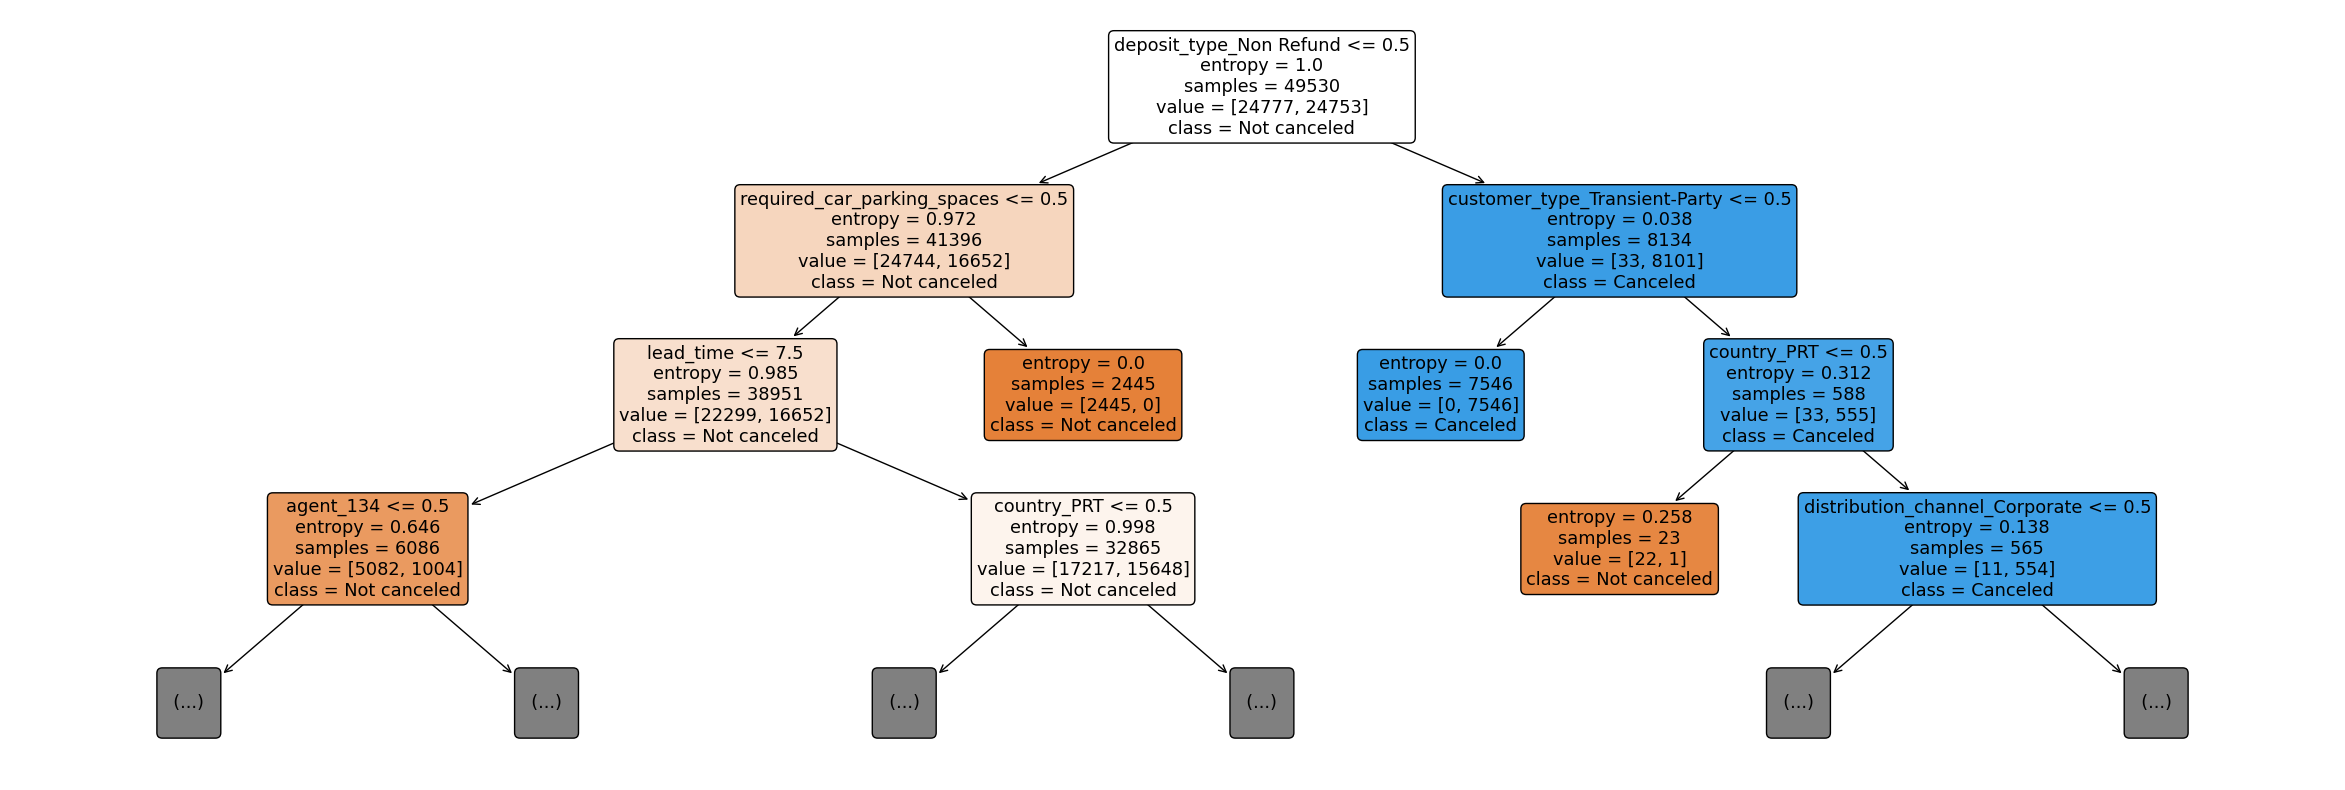

In [ ]:
feature_names = df_train_completo_x.columns.to_list()
grafico_arbol(clf, feature_names=feature_names, max_depth=3, figsize=(30, 10))

In [ ]:
print(f"Profundidad del árbol: {clf.tree_.max_depth}")

Profundidad del árbol: 26


Graficar el árbol es muy útil, ya que nos permite ver rápidamente qué preguntas se hace para ir decidiendo si una reserva será cancelada o no. Cuanto más naranja es el nodo, significa que la proporción de reservas no canceladas que toman ese camino es mayor. Por el contrario, cuanto más azul es el nodo, proporción de reservas canceladas que toman ese camino es mayor.

## **c) Análisis y descripción de atributos y decisiones evaluadas por el árbol**

Lista de los 10 atributos más importantes del árbol

In [ ]:
imprimir_importancia_atributos(clf, top_n=10)

1. deposit_type_Non Refund: 0.29634468555460214
2. market_segment_Online TA: 0.12123818374464729
3. lead_time: 0.08457223744790528
4. required_car_parking_spaces: 0.06239634991573188
5. total_of_special_requests: 0.05998380257917617
6. country_PRT: 0.05560982979279925
7. previous_cancellations: 0.032188255541832626
8. agent_240: 0.030443368978442225
9. arrival_date_year: 0.027418808778016408
10. customer_type_Transient: 0.02157343662415336


Entendemos que la importancia refiere a cuán decisivos son estos atributos a la hora de clasificar una reserva como cancelada o no cancelada.

Podemos ver que el atributo más importante es el tipo de depósito, y la pregunta que se hace el árbol es si este es "Non Refund" o si es otro. En el gráfico, podemos apreciar que el nodo raíz es este mismo, y que de las 8134 reservas que su tipo de depósito es "Non Refund", 8101 reservas fueron canceladas. Es por esto que este atributo es tan importante, porque sabiendo que el tipo de depósito es "Non Refund", la probabilidad de que la reserva sea cancelada es altísima.

Luego, le siguen otros atributos en el orden de importancia. Entre ellos está el atributo "required_car_parking_spaces" (cantidad de cocheras requeridas), que ocurre con él algo similar al mencionado anteriormente. En este caso, el árbol se pregunta si "required_car_parking_spaces" es menor o igual a 0.5 (para las reservas que "deposit_type" es distinto de "Non Refund"), es decir, si se no se requirió ninguna cochera. Las 2445 reservas que necesitaron por lo menos una no fueron canceladas. Esto es lo que lo hace tan importante. 

Cabe destacar que, cuantas más veces se pregunte por un atributo, más importante será.

## **d) Evaluación de la performance del modelo en entrenamiento y validación, explicación de todas las métricas, matriz de confusión**

Para hallar el mejor modelo, la métrica que elegimos para compararlos fue el F1 Score. Sin embargo, es importante analizar todas las métricas una vez encontrado el modelo.

              precision    recall  f1-score   support

           0     0.8549    0.8541    0.8545      6195
           1     0.8541    0.8549    0.8545      6188

    accuracy                         0.8545     12383
   macro avg     0.8545    0.8545    0.8545     12383
weighted avg     0.8545    0.8545    0.8545     12383



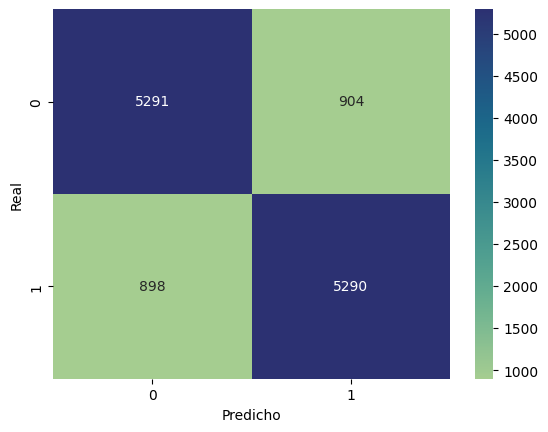

In [ ]:
y_pred_train = clf.predict(x_val)
print(classification_report(y_val,y_pred_train, digits=4))
grafico_matriz_confusion(y_val, y_pred_train)

Para comenzar con el análisis, vemos cómo se calcula cada métrica. La precisión se calcula como la cantidad de valores predichos correctamente de una clase dividido la cantidad total de valores de dicha clase. Por ejemplo, viendo la matriz de confusión, podemos verificar que la precisión de la clase 0 (negative) se calcula como TN/(TN+FN) = 0.8549.

$Precision = \frac{TX}{TX + FX}$, siendo X positive (clase 1) o negative (clase 0).

Luego, el recall mide, de la cantidad de valores reales de una clase, cuántos se predijeron de esa clase.

$Recall = \frac{TX}{TX + FY}$, siendo X positive (clase 1) o negative (clase 0) e Y el complemento de X.

Por último, el F1 Score es mide un balance entre la precisión y el recall.

$F1 Score = 2.\frac{Precision . Recall}{Precision + Recall}$

Además, para saber el valor de cada métrica pero respecto al modelo en general, se hace un promedio de los valores de cada una en cada clase.

Como mencionamos al comienzo de la sección a), elegimos como métrica el F1 Score para optimizar la búsqueda de hiperparámetros, y así lograr el balance entre precisión y recall mencionado anteriormente. Podemos ver que alcanzamos este objetivo ya que la precisión del modelo resultó ser 0.85447809 y el recall 0.85447814, valores muy similares.

## **e) Generación de predicciones con el conjunto de test para realizar los submits correspondientes en la competencia de Kaggle**




En este apartado generaremos distintas predicciones para el conjunto de test "hotels_test.csv" mediante distintos árboles, cuyos hiperparámetros fueron encontrados con Cross Validation.

Hacemos la predicción, creamos el dataframe con las columnas 'id' e 'is_canceled' (variable predicha), y lo exportamos a un archivo .csv

In [ ]:
f1_score_en_train = f1_score(y_val, y_pred_train, average='weighted')
predecir_y_exportar_a_csv(clf, df_test_completo, f1_score_en_train)

Exportamos el modelo

In [ ]:
guardar_modelo(clf, f1_score_en_train)

A lo largo de la realización del TP, fuimos variando las formas de buscar los hiperparámetros de nuestro modelo, por lo que obtuvimos varias predicciones, las cuales fuimos subiendo a la competencia.